https://towardsdatascience.com/finding-m%C2%B2-details-on-a-floorplan-using-unsupervised-learning-f8f8891befa9

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['contour']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


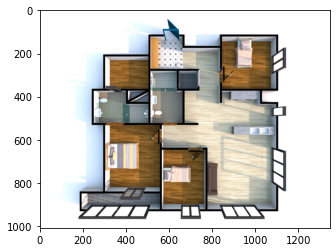

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

import numpy as np
import sys
import os

from skimage.metrics import structural_similarity

import cv2

import argparse
#import imutils


img = mpimg.imread('img/to_label/421234_89068.jpeg')

if img is None:
    print('Image load failed!')
    sys.exit()
    
imgplot = plt.imshow(img)
plt.show()

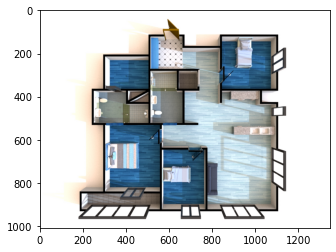

In [7]:
image = cv2.imread('img/to_label/421234_89068.jpeg', cv2.IMREAD_COLOR) #, cv2.IMREAD_COLOR)
plt.imshow(image)

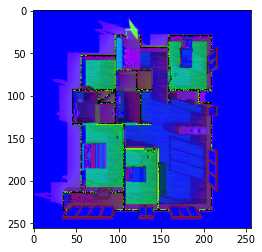

In [51]:
# HSV로 색 추출
hsvLower = np.array([59, 70, 30])#[80, 10, 10])    # 추출할 색의 하한(HSV)
hsvUpper = np.array([180, 90, 50])#[200, 86, 40])    # 추출할 색의 상한(HSV)
image = cv2.resize(image,(256,256))
hsv = cv2.cvtColor(image ,cv2.COLOR_BGR2HSV) # 이미지를 HSV으로 변환
hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSV에서 마스크를 작성
result = cv2.bitwise_and(image, image, mask=hsv_mask) # 원래 이미지와 마스크를 합성

plt.imshow(hsv)


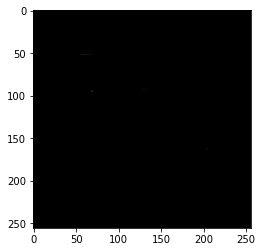

In [52]:
plt.imshow(result)

## 1. Image Segmentation using K-means

In [26]:
img = cv2.imread('img/421234_89068.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [27]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10


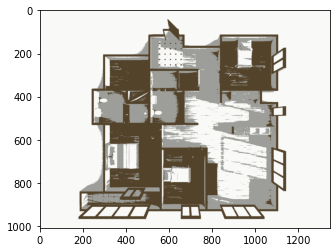

In [28]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.imshow(result_image)

## 2. Image Segmentation using Contour Detection

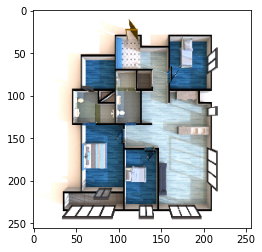

In [54]:


img = cv2.imread('img/421234_89068.jpeg')
img = cv2.resize(img,(256,256))
plt.imshow(img)

In [55]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 355, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh, 0, 355),None)

In [56]:
#cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
cnt = sorted(cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1) #외곽선그리기 함수

In [58]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)


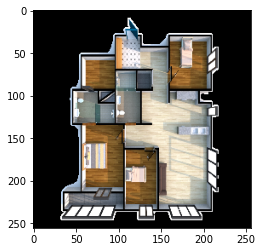

In [59]:
plt.imshow(segmented)

In [63]:

# HSV로 색 추출
hsvLower = np.array([35, 52, 72])    # 추출할 색의 하한(HSV) #low_green
hsvUpper = np.array([126, 255, 255])    # 추출할 색의 상한(HSV) #high_green
segmented = cv2.resize(segmented,(256,256))
hsv = cv2.cvtColor(segmented, cv2.COLOR_BGR2HSV) # 이미지를 HSV으로 변환
hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSV에서 마스크를 작성
result = cv2.bitwise_and(segmented , segmented, mask=hsv_mask) # 원래 이미지와 마스크를 합성


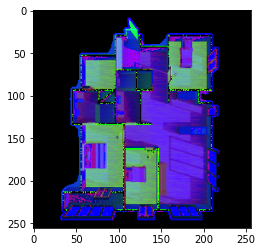

In [64]:
plt.imshow(hsv)

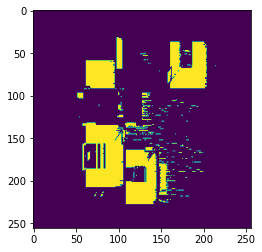

In [65]:
plt.imshow(hsv_mask)

In [68]:
ratio = cv2.countNonZero(hsv_mask)/(hsv_mask.size/3)
print('pixel percentage:', np.round(ratio*100, 2))

pixel percentage: 40.77


In [8]:
imthres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
# 컨투어 계층 트리 (cntr_hierachy.py)

import numpy as np

# 영상 읽기
img = cv2.imread('img/to_label/421234_89068.jpeg')
img2 = img.copy()
# 그레이 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
#print(len(contour), hierarchy)

# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력 ---④
#print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (255,0,0), 3)

# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 5)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

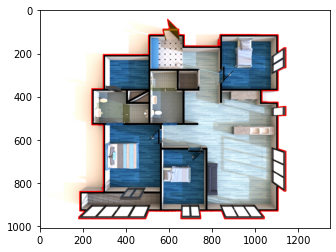

In [32]:
# 화면 출력
plt.imshow(img)


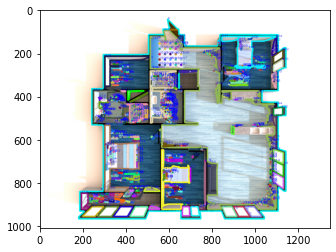

In [33]:
plt.imshow(img2)

#export image 
#from PIL import Image
#new_image = Image.fromarray(img2)
#new_image.save('seg.png')

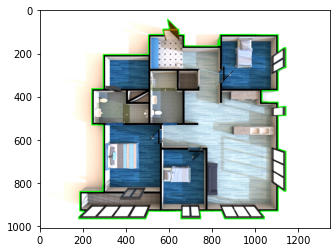

In [28]:
plt.imshow( cv2.drawContours(img, contour, -1, (0,255,0), 3) )

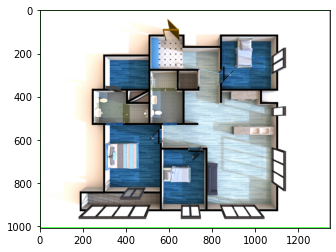

In [3]:
# 근사 컨투어 (cntr_approximate.py)

img = cv2.imread('img/to_label/421234_89068.jpeg')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 ---①
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 ---②
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 ---③
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

plt.imshow(img2)


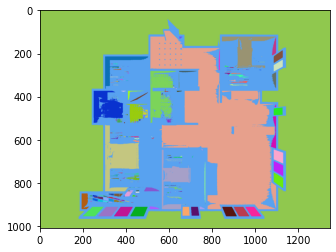

In [5]:
# 연결된 영역 레이블링 (connected_label.py)

# 이미지 읽기
img = cv2.imread('img/to_label/421234_89068.jpeg')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용 ---①
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용 ---②
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
plt.imshow(img)
plt.imshow(img2)


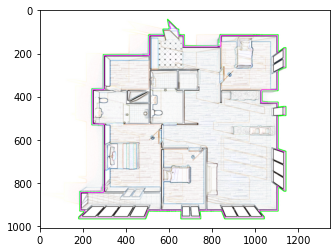

In [10]:
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 5)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
plt.imshow(result_norm)


( Image.fromarray(result_norm)).save('normalized2.png')

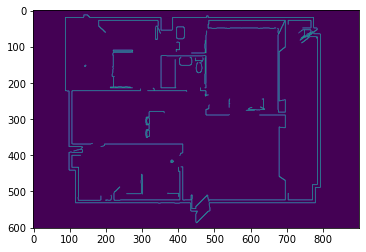

In [4]:
# displaying image
img_canny = cv2.Canny(image, 300, 700, apertureSize = 3)
plt.imshow(img_canny)

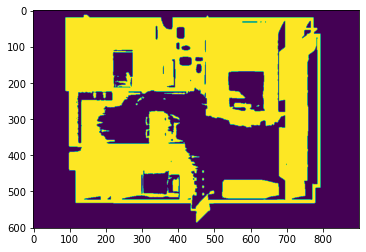

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,9), 0)
thresh = cv2.threshold(blur, 0, 335, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(gray)
plt.imshow(blur)
plt.imshow(thresh)

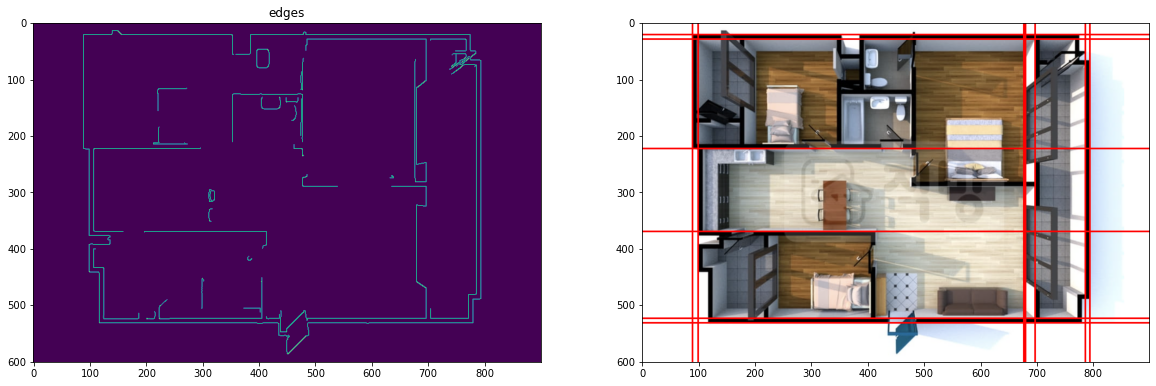

In [14]:
# Load the image
image = cv2.imread('img/zigbang.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Canny Edges
edges = cv2.Canny(gray, 400, 700, apertureSize = 3)
plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)
# Run HoughLines Fucntion 
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# Run for loop through each line
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x_1 = int(x0 + 1000 * (-b))
    y_1 = int(y0 + 1000 * (a))
    x_2 = int(x0 - 1000 * (-b))
    y_2 = int(y0 - 1000 * (a))
    cv2.line(image, (x_1, y_1), (x_2, y_2), (255, 0, 0), 2)
# Show Final output
plt.subplot(2, 2, 2)
plt.imshow(image)


In [20]:

def find_rooms(img, noise_removal_threshold=25, corners_threshold=0.1,
               room_closing_max_length=100, gap_in_wall_threshold=500):
    """

    :param img: grey scale image of rooms, already eroded and doors removed etc.
    :param noise_removal_threshold: Minimal area of blobs to be kept.
    :param corners_threshold: Threshold to allow corners. Higher removes more of the house.
    :param room_closing_max_length: Maximum line length to add to close off open doors.
    :param gap_in_wall_threshold: Minimum number of pixels to identify component as room instead of hole in the wall.
    :return: rooms: list of numpy arrays containing boolean masks for each detected room
             colored_house: A colored version of the input image, where each room has a random color.
    """
    assert 0 <= corners_threshold <= 1
    # Remove noise left from door removal

    img[img < 128] = 0
    img[img > 128] = 255
    _, contours, _ = cv2.findContours(~img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(img)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > noise_removal_threshold:
            cv2.fillPoly(mask, [contour], 255)

    img = ~mask

    # Detect corners (you can play with the parameters here)
    dst = cv2.cornerHarris(img ,2,3,0.04)
    dst = cv2.dilate(dst,None)
    corners = dst > corners_threshold * dst.max()

    # Draw lines to close the rooms off by adding a line between corners on the same x or y coordinate
    # This gets some false positives.
    # You could try to disallow drawing through other existing lines for example.
    for y,row in enumerate(corners):
        x_same_y = np.argwhere(row)
        for x1, x2 in zip(x_same_y[:-1], x_same_y[1:]):

            if x2[0] - x1[0] < room_closing_max_length:
                color = 0
                cv2.line(img, (x1, y), (x2, y), color, 1)

    for x,col in enumerate(corners.T):
        y_same_x = np.argwhere(col)
        for y1, y2 in zip(y_same_x[:-1], y_same_x[1:]):
            if y2[0] - y1[0] < room_closing_max_length:
                color = 0
                cv2.line(img, (x, y1), (x, y2), color, 1)


    # Mark the outside of the house as black
    _, contours, _ = cv2.findContours(~img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    mask = np.zeros_like(mask)
    cv2.fillPoly(mask, [biggest_contour], 255)
    img[mask == 0] = 0

    # Find the connected components in the house
    ret, labels = cv2.connectedComponents(img)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    unique = np.unique(labels)
    rooms = []
    for label in unique:
        component = labels == label
        if img[component].sum() == 0 or np.count_nonzero(component) < gap_in_wall_threshold:
            color = 0
        else:
            rooms.append(component)
            color = np.random.randint(0, 255, size=3)
        img[component] = color

    return rooms, img



#Read gray image
img = cv2.imread("img/zigbang.png", 0)
rooms, colored_house = find_rooms(img.copy())


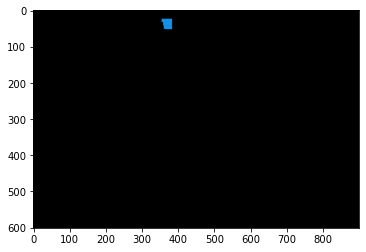

In [17]:
plt.imshow( colored_house)

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

print(pytesseract.image_to_string(thresh))

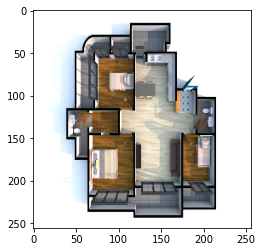

In [7]:
import requests
import numpy as np
import cv2

url = 'https://s3-ap-northeast-1.amazonaws.com/zigbang/floorplan/9987/42222/61314604c59544828d290c0d9710f33d.png'
image_nparray = np.asarray(bytearray(requests.get( url ).content), dtype=np.uint8)
img = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))
plt.imshow(img)

In [8]:
img.shape

(256, 256, 3)

In [10]:
cv2.imdecode(image_nparray, cv2.IMREAD_COLOR).shape

(1009, 1345, 3)